# Task 1


# import Libraries

In [1]:
#import libraries
import  numpy as np # Import NumPy for numerical computing
from sklearn import svm
import matplotlib.pyplot as plt 
import matplotlib as mpl # Import Matplotlib for data visualization
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.linear_model import Perceptron
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import mean_squared_error

# Funcations will be used 

 Function to plot Decision Boundary

svm function

In [3]:
#This function plots the decision boundary of a trained classifier on the training and test data.
def plot_decision_boundary(model, X_Train, Y_Train,X_Test,Y_Tes,title):   

        # Define color information for the plot
        # use = (
        #     ((1,9),(.2,.1),'b'),
        #     ((4,2),(.1,.1),'xkcd:orange'),
        #     ((4,0),(.2,.4),'r')
            
        #     )
        # use_2 = (
        #     ((4,2),(.1,.1),'xkcd:orange'),
        #     ((4,0),(.2,.4),'r'),
        #     ((1,9),(.2,.1),'b'))
             
        # Create custom colormaps using the color information from use and use_2
            
           
        #cm = LinearSegmentedColormap.from_list('use', [u[2] for u in use], N=len(use))
        cm = LinearSegmentedColormap.from_list(
        'mycmap', [(0, 'orange'), (0.5, 'red'), (1, 'blue')])
        #cm_2 = LinearSegmentedColormap.from_list('use_2', [u[2] for u in use_2], N=len(use_2))
        cm_2 = LinearSegmentedColormap.from_list(
        'mycmap', [(0, 'INDIGO'), (0.5, 'Gold'), (1, '#63C5DA' )])
       
        h = 0.001
        # Create a mesh grid to plot the decision boundary
        x_min, x_max = X_Train[:, 0].min() - .1, X_Train[:, 0].max() + .1
        y_min, y_max = X_Train[:, 1].min() - .1, X_Train[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Predict the class labels for the mesh grid
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        print(Z)

        #Define color, marker, and position information for plot elements
        plt.figure(figsize=(8,5))
        plt.contourf(xx, yy, Z,cmap=cm)
        plt.scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train,cmap=cm_2, label='Traning_Set' )
        plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test,cmap=cm_2 ,marker="+",label='Test_Set')
        plt.xlabel('t-SNE dimension 1')
        plt.ylabel('t-SNE dimension 2')
        plt.title(title)
        plt.legend()
        plt.show()


In [4]:
 # This function preprocesses the labels of the training and test sets by converting labels that match the specified number_class to 1, and all other labels to 0.
def preprocceing(number_class,Y_Train,Y_Test):
  for i in range(len(Y_Train)):
    if Y_Train[i]!=number_class:
       Y_Train[i]=0
    else: 
      Y_Train[i]=1
  for i in range(len(Y_Test)):
    if Y_Test[i]!=number_class:
          Y_Test[i]=0
    else: 
        Y_Test[i]=1

In [5]:
# This function takes in a numpy array of predicted probabilities for multiple classes and returns the predicted probabilities of belonging to class 1
def getmax(list_probablity):
  Y_pro_final=list_probablity[:,1]
  return  Y_pro_final  

In [6]:
# This function takes the predicted class probabilities for each of the three classes and returns the predicted class labels for each sample in the test set.
def Svm_predict(Y_pro_0,Y_pro_1,Y_pro_2):
  y_pred=[]  # Create an empty list to store the predicted class labels
  print(Y_pro_0,"\n",Y_pro_1,'\n',Y_pro_2)
  for i in range (len(Y_pro_0)):
    # For each sample in the test set, determine the predicted class label based on the highest predicted probability for that sample
    if (Y_pro_0[i]>=Y_pro_1[i] and Y_pro_0[i]>=Y_pro_2[i]):
       y_pred.append(0)
    elif  Y_pro_1[i]>=Y_pro_2[i]:
      y_pred.append(1)
    else :
      y_pred.append(2)  

   
  return  y_pred   

In [8]:
# This function takes in a numpy array of predicted probabilities for multiple classes and returns the predicted probabilities of belonging to class 1
def getmax(list_probablity):
  Y_pro_final=list_probablity[:,1]
  return  Y_pro_final  
    

In [7]:
# This function takes the predicted class probabilities for each of the three classes and returns the predicted class labels for each sample in the test set.
def Svm_predict(Y_pro_0,Y_pro_1,Y_pro_2):
  y_pred=[]  # Create an empty list to store the predicted class labels
  print(Y_pro_0,"\n",Y_pro_1,'\n',Y_pro_2)
  for i in range (len(Y_pro_0)):
    # For each sample in the test set, determine the predicted class label based on the highest predicted probability for that sample
    if (Y_pro_0[i]>=Y_pro_1[i] and Y_pro_0[i]>=Y_pro_2[i]):
       y_pred.append(0)
    elif  Y_pro_1[i]>=Y_pro_2[i]:
      y_pred.append(1)
    else :
      y_pred.append(2)  

   
  return  y_pred   

In [9]:
 # This function preprocesses the labels of the training and test sets by converting labels that match the specified number_class to 1, and all other labels to 0.
def preprocceing(number_class,Y_Train,Y_Test):
  for i in range(len(Y_Train)):
    if Y_Train[i]!=number_class:
       Y_Train[i]=0
    else: 
      Y_Train[i]=1
  for i in range(len(Y_Test)):
    if Y_Test[i]!=number_class:
          Y_Test[i]=0
    else: 
        Y_Test[i]=1
  return  Y_Train, Y_Test

persptorn function 

In [10]:
#This function predicts the class labels for the test data using three trained Perceptron classifiers.
def perceptron_predict_data(Y_pro_0,Y_pro_1,Y_pro_2):
  y_pred=[] # Initialize an empty list to store the predicted class labels
   # Compute the decision function values for the test data using the Perceptron classifier for each class
  # y_0=model_0.decision_function(X_Test) 
  # y_1=model_1.decision_function(X_Test)
  # y_2=model_2.decision_function(X_Test)
  # Iterate over the decision function values for each sample in the test set and use them to predict the corresponding class label
  for i in range(len(Y_pro_0)):
    if(Y_pro_0[i]>=Y_pro_1[i] and Y_pro_0[i]>=Y_pro_2[i]):
      y_pred.append(0)
    elif(Y_pro_1[i]>=Y_pro_2[i]): 
      y_pred.append(1)
    else: 
      y_pred.append(2)



  
  return  y_pred  
  

In [11]:
#This function predicts the class labels for the test data using three trained Perceptron classifiers.
def perceptron_predict(model_0,model_1,model_2,X_Test):
  y_pred=[] # Initialize an empty list to store the predicted class labels
   # Compute the decision function values for the test data using the Perceptron classifier for each class
  y_0=model_0.decision_function(X_Test) 
  y_1=model_1.decision_function(X_Test)
  y_2=model_2.decision_function(X_Test)
  # Iterate over the decision function values for each sample in the test set and use them to predict the corresponding class label
  for i in range(len(y_0)):
    if(y_0[i]>=y_1[i] and y_0[i]>=y_2[i]):
      y_pred.append(0)
    elif(y_1[i]>=y_2[i]): 
      y_pred.append(1)
    else: 
      y_pred.append(2)



  
  return  y_pred  

compare Function 

In [12]:

def compare_plot(title,Result_from_svm,Result_from_persptorn ):
    Algomodels = ['SVM','persptorn']
    Accuracies = [Result_from_svm*100,Result_from_persptorn*100]
    plt.figure(figsize=(10,9))
    plt.bar(Algomodels,Accuracies)
    plt.title('Model Accuracies :'+title)
    plt.ylabel('Accuracy Test')
    plt.ylim(0,100)
    plt.xticks(rotation=45)
    plt.show()

In [13]:
def compare_plot_svm(title,Result_from_svm,Result_from_persptorn ):
    Algomodels = ['SVM defualt','SVM  O vs Rest']
    Accuracies = [Result_from_svm*100,Result_from_persptorn*100]
    plt.figure(figsize=(10,9))
    plt.bar(Algomodels,Accuracies)
    plt.title('Model Accuracies :'+title)
    plt.ylabel('Accuracy Test')
    plt.ylim(0,100)
    plt.xticks(rotation=45)
    plt.show()

# plot Aggregate data

In [16]:
#This function plots the decision boundary of a trained classifier on the training and test data.
def plot_decision_boundary_Agrgate(type_model,model_0,model_1,model_2, X_Train, Y_Train,X_Test,Y_Test,title):   
# Define color information for the plot
    # use = (
    #     ((1,9),(.2,.1),'b'),
    #     ((4,2),(.1,.1),'xkcd:orange'),
    #     ((4,0),(.2,.4),'r')
        
    #     )
    # use_2 = (
    #     ((4,2),(.1,.1),'xkcd:orange'),
    #      ((4,0),(.2,.4),'r'),
    #     ((1,9),(.2,.1),'b')
        
# Create custom colormaps using the color information from use and use_2
        
        
    cm = LinearSegmentedColormap.from_list(
        'mycmap', [(0, 'orange'), (0.5, 'red'), (1, 'blue')])
        #cm_2 = LinearSegmentedColormap.from_list('use_2', [u[2] for u in use_2], N=len(use_2))
    cm_2 = LinearSegmentedColormap.from_list(
        'mycmap', [(0, 'INDIGO'), (0.5, 'Gold'), (1, '#63C5DA' )])
    h = 0.001
  # Create a mesh grid to plot the decision boundary
    x_min, x_max = X_Train[:, 0].min() - .1, X_Train[:, 0].max() + .1
    y_min, y_max = X_Train[:, 1].min() - .1, X_Train[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class labels for the mesh grid
    #class 0
    if(type_model=='SVM'):
      Z_0 = model_0.predict_proba(np.c_[xx.ravel(), yy.ravel()])
      Z_0=getmax(Z_0)
      #Z_0 = Z_0.reshape(xx.shape)
      #class 1
      Z_1 = model_1.predict_proba(np.c_[xx.ravel(), yy.ravel()])
      Z_1=getmax(Z_1)
      #Z_1 = Z_1.reshape(xx.shape)
      #class 2
      Z_2 = model_2.predict_proba(np.c_[xx.ravel(), yy.ravel()])
      Z_2=getmax(Z_2)
      #Z_2 = Z_2.reshape(xx.shape)
      Z=Svm_predict(Z_0,Z_1,Z_2)
      Z = np.array(Z).reshape(xx.shape)
    elif(type_model=='PERC'):
      perceptron_1.decision_function(X_Test)
      Z_0 = model_0.decision_function(np.c_[xx.ravel(), yy.ravel()])
      #Z_0 = Z_0.reshape(xx.shape)
      #class 1
      Z_1 = model_1.decision_function(np.c_[xx.ravel(), yy.ravel()])
      #Z_1 = Z_1.reshape(xx.shape)
      #class 2
      Z_2 = model_2.decision_function(np.c_[xx.ravel(), yy.ravel()])
      #Z_2 = Z_2.reshape(xx.shape)
      print()
      Z=perceptron_predict_data(Z_0,Z_1,Z_2)
      Z = np.array(Z).reshape(xx.shape)


    else:
      print("enter the type of model  in right way \" SVM \"  : \"PERC \" ")
      return   
    print(Z_0)

#Define color, marker, and position information for plot elements
    plt.figure(figsize=(8,5))
    plt.contourf(xx, yy, Z,cmap=cm)
    plt.scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train,cmap=cm_2, label='Traning_Set' )
    plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test,cmap=cm_2 ,marker="+",label='Test_Set')
    plt.xlabel('t-SNE dimension 1')
    plt.ylabel('t-SNE dimension 2')
    plt.title(title)
    plt.legend()
    plt.show()


# Load DataSet

In [15]:
#Define the training and test datasets
X_Train = np.array([[1.3, 3.3], [1.4, 2.5], [1.8, 2.8], [1.9, 3.1], [1.5, 1.5], [1.8, 2], [2.3, 1.9], [2.4, 1.4], [2.4, 2.4], [2.4, 3], [2.7, 2.7], [2.3, 3.2]])
Y_Train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

X_Test = np.array([[1.7, 2.5], [1.9, 2.7], [2, 2.15], [2.4, 2], [2.2, 3.25], [2.4, 2.25]])
Y_Test = np.array([0, 0, 1, 1, 2, 2])

# Defult SVC  Model

In [17]:
SVM=svm.SVC() # Create an instance of the SVM classifier
SVM.fit(X_Train,Y_Train) # Train the SVM classifier using the training data
Y_Pred=SVM.predict(X_Test) # test the model 
print('accuracy_training ',SVM.score(X_Train,Y_Train))  # Evaluate the accuracy of the trained model on the training data with the modified labels for class 0
print('accuracy_test ',SVM.score(X_Test,Y_Test)) # Evaluate the accuracy of the trained model on the test data with the modified labels for class 0

print(Y_Pred)

accuracy_training  1.0
accuracy_test  1.0
[0 0 1 1 2 2]


# Confusion Matrix SVM default

Train Set

Text(0.5, 1.0, 'Confusion Matrix:SVM default Train SET')

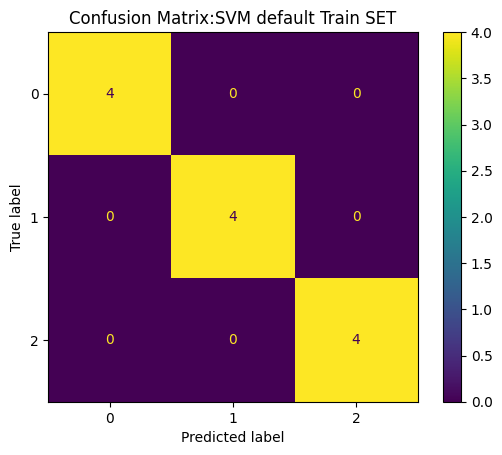

In [18]:
#print('\nConfusion Matrix:_Train_SET\n') # Print a header for the confusion matrix for the training set
ConfusionMatrixDisplay.from_estimator(SVM, X_Train, Y_Train) # Generate and display the confusion matrix for the training set
plt.title('Confusion Matrix:SVM default Train SET')

Test set

Text(0.5, 1.0, 'Confusion Matrix:SVM default TEST SET')

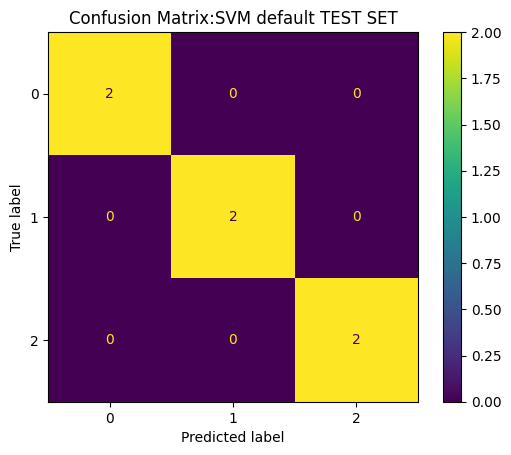

In [19]:
#print('\nConfusion Matrix: TEST SET\n')
ConfusionMatrixDisplay.from_estimator(SVM, X_Test, Y_Test)   # Generate and display the confusion matrix for the test set
plt.title('Confusion Matrix:SVM default TEST SET')

#decision boundary SVM defuat

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


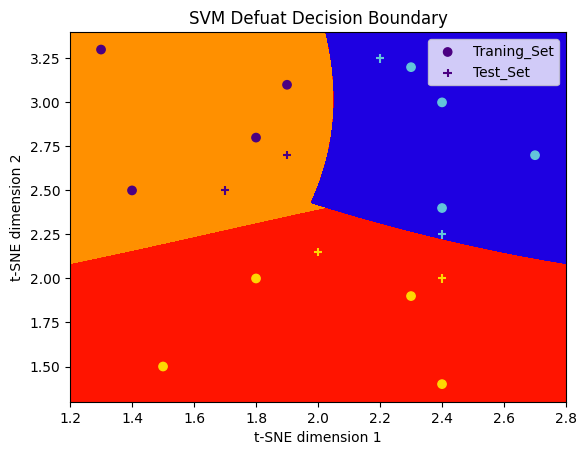

In [ ]:
plot_decision_boundary(SVM, X_Train, Y_Train,X_Test,Y_Test,"SVM Defuat Decision Boundary")

# GET the best parameter in SVM default 

In [21]:
SVM_best=svm.SVC(C=3,degree=4,kernel='rbf',verbose=True) # Create an instance of the SVM classifier
SVM_best.fit(X_Train,Y_Train) # Train the SVM classifier using the training data
Y_Pred=SVM_best.predict(X_Test) # test the model 
print('accuracy_training ',SVM_best.score(X_Train,Y_Train))  # Evaluate the accuracy of the trained model on the training data with the modified labels for class 0
print('accuracy_test ',SVM_best.score(X_Test,Y_Test)) # Evaluate the accuracy of the trained model on the test data with the modified labels for class 0

print(Y_Pred)

[LibSVM]accuracy_training  1.0
accuracy_test  1.0
[0 0 1 1 2 2]


Text(0.5, 1.0, 'Confusion Matrix: NEW SVM  Train SET')

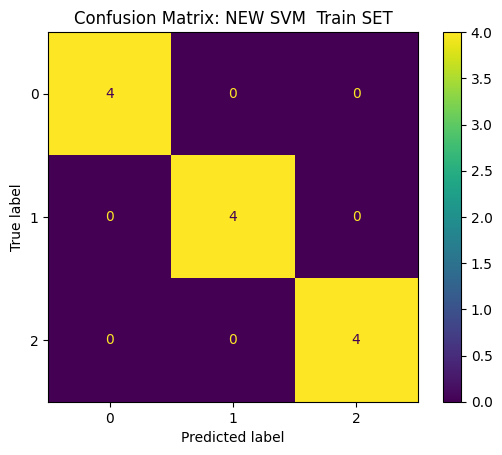

In [22]:
#print('\nConfusion Matrix:_Train_SET\n') # Print a header for the confusion matrix for the training set
ConfusionMatrixDisplay.from_estimator(SVM_best, X_Train, Y_Train) # Generate and display the confusion matrix for the training set
plt.title('Confusion Matrix: NEW SVM  Train SET')

Text(0.5, 1.0, 'Confusion Matrix: NEW SVM  TEST SET')

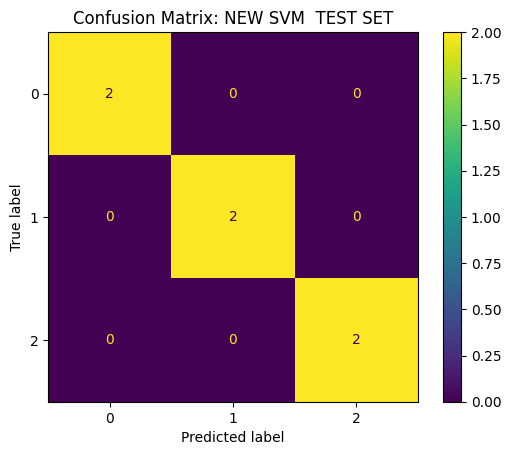

In [24]:
#print('\nConfusion Matrix:_Train_SET\n') # Print a header for the confusion matrix for the training set
ConfusionMatrixDisplay.from_estimator(SVM_best, X_Test, Y_Test) # Generate and display the confusion matrix for the training set
plt.title('Confusion Matrix: NEW SVM  TEST SET')

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


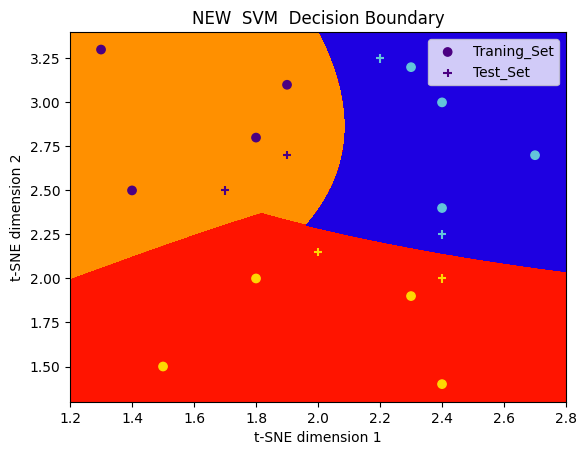

In [ ]:
plot_decision_boundary(SVM_best, X_Train, Y_Train,X_Test,Y_Test,"NEW  SVM  Decision Boundary")

# O VS REST

class 0 vs class 1,2

preprocing  data set 

In [26]:
Y_Train_0,Y_Test_0=preprocceing(0,Y_Train.copy(),Y_Test.copy())

In [27]:
SVM_0=svm.SVC(kernel='linear',probability=True,random_state=14)
SVM_0.fit(X_Train,Y_Train_0)  # Train the SVM model on the training data with the modified labels for class 0
print('accuracy_training ',SVM_0.score(X_Train,Y_Train_0))  # Evaluate the accuracy of the trained model on the training data with the modified labels for class 0
print('accuracy_test ',SVM_0.score(X_Test,Y_Test_0)) # Evaluate the accuracy of the trained model on the test data with the modified labels for class 0


accuracy_training  0.8333333333333334
accuracy_test  0.6666666666666666


In [28]:
Y_pro_0=SVM_0.predict_proba(X_Test) # Generate the predicted class probabilities for the test set using the trained SVM model with modified labels for class 0
Y_tra_0=SVM_0.predict_proba(X_Train)
Y_pryd=SVM_0.predict(X_Test) 
print(Y_pro_0)


[[0.5246027  0.4753973 ]
 [0.56950992 0.43049008]
 [0.80448775 0.19551225]
 [0.93469685 0.06530315]
 [0.53797872 0.46202128]
 [0.90550849 0.09449151]]


GEt probatiy for profing this a Class 0

In [29]:
Y_pro_0=getmax(Y_pro_0)
print("probability of class 1", (Y_pro_0))

probability of class 1 [0.4753973  0.43049008 0.19551225 0.06530315 0.46202128 0.09449151]


# Confusion Matrix Class 0

 train set 

Text(0.5, 1.0, 'Confusion Matrix:  SVM Class 0  Train SET')

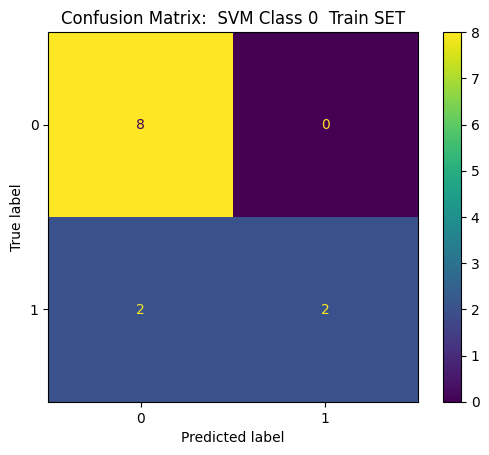

In [30]:
#print('\nConfusion Matrix Class 0:_ train set \n')
ConfusionMatrixDisplay.from_estimator(SVM_0, X_Train, Y_Train_0)
plt.title('Confusion Matrix:  SVM Class 0  Train SET')

TEST set


Confusion Matrix Class 0:_ TESt set  SET



Text(0.5, 1.0, 'Confusion Matrix:  SVM Class 0  TEST SET')

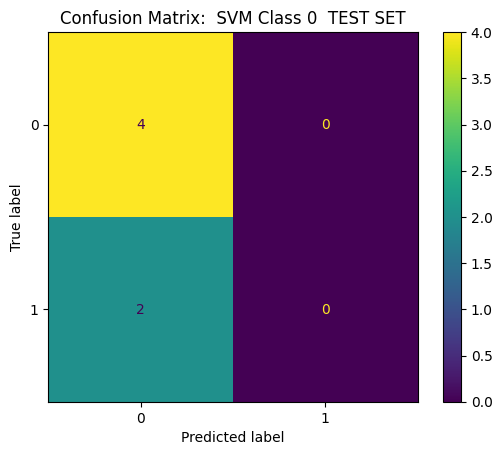

In [31]:
print('\nConfusion Matrix Class 0:_ TESt set  SET\n')
ConfusionMatrixDisplay.from_estimator(SVM_0, X_Test, Y_Test_0)
plt.title('Confusion Matrix:  SVM Class 0  TEST SET')

# Decision Boundary class 0 vs class 1 , Class 2

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


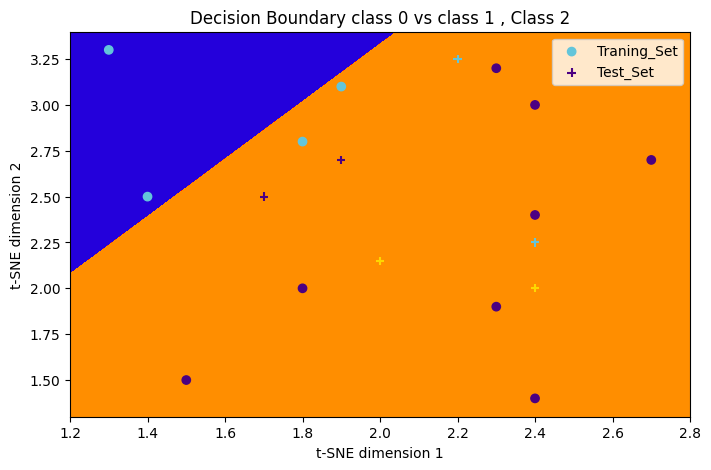

In [32]:
plot_decision_boundary(SVM_0, X_Train, Y_Train_0,X_Test,Y_Test_0,'Decision Boundary class 0 vs class 1 , Class 2')

class 1 vs class 0,2

preprocing data set

In [33]:
Y_Train_1,Y_Test_1=preprocceing(1,Y_Train.copy(),Y_Test.copy())

In [34]:
SVM_1=svm.SVC(kernel='linear',probability=True,random_state=14)
SVM_1.fit(X_Train,Y_Train_1)
print('accuracy_training ',SVM_1.score(X_Train,Y_Train_1))  # Evaluate the accuracy of the trained model on the training data with the modified labels for class 0
print('accuracy_test ',SVM_1.score(X_Test,Y_Test_1)) # Evaluate the accuracy of the trained model on the test data with the modified labels for class 0


accuracy_training  1.0
accuracy_test  0.8333333333333334


In [35]:
#Use the SVM_1 classifier to predict the class probabilities for each sample in the test set and store the probabilities in Y_pro_1
Y_pryd=SVM_1.predict(X_Test) 
Y_pro_1=SVM_1.predict_proba(X_Test)
Y_tra_1=SVM_1.predict_proba(X_Train)
SVM_1.score(X_Test,Y_Test_1)
print(Y_pro_1)

[[0.70887864 0.29112136]
 [0.81876162 0.18123838]
 [0.5        0.5       ]
 [0.42934986 0.57065014]
 [0.95666737 0.04333263]
 [0.60083695 0.39916305]]


GEt probatiy for profing this a Class 1

In [36]:
Y_pro_1=getmax(Y_pro_1)
print(Y_pro_1)

[0.29112136 0.18123838 0.5        0.57065014 0.04333263 0.39916305]


# Confusion Matrix Class 1


train set

Text(0.5, 1.0, 'Confusion Matrix:  SVM Class 1  Train SET')

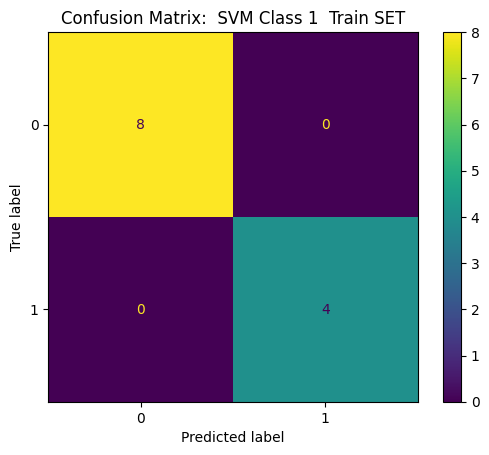

In [38]:
#print('\nConfusion Matrix Class 1:_ train set\n')
ConfusionMatrixDisplay.from_estimator(SVM_1, X_Train, Y_Train_1)
plt.title('Confusion Matrix:  SVM Class 1  Train SET')

Test Set

Text(0.5, 1.0, 'Confusion Matrix:  SVM Class 1  TEST SET')

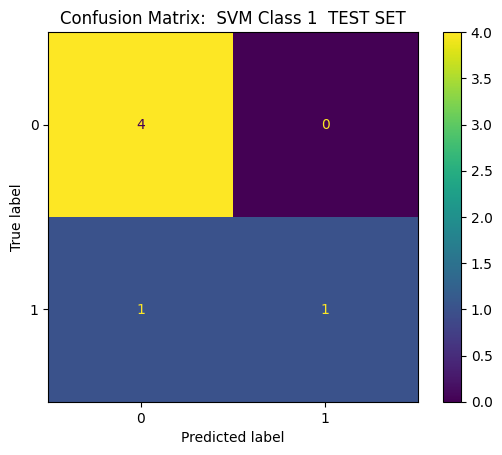

In [39]:
#print('\nConfusion Matrix Class 1:_ TESt set  SET\n')
ConfusionMatrixDisplay.from_estimator(SVM_1, X_Test, Y_Test_1)
plt.title('Confusion Matrix:  SVM Class 1  TEST SET')

# Decision Boundary class 1 vs class 2 , Class 0

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


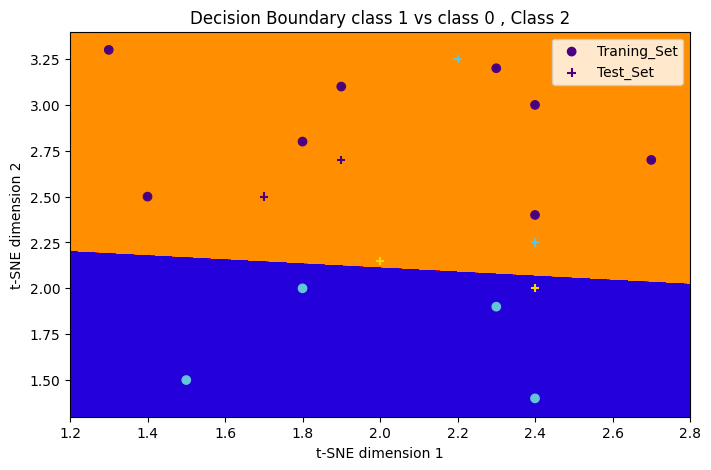

In [40]:
plot_decision_boundary(SVM_1, X_Train, Y_Train_1,X_Test,Y_Test_1,'Decision Boundary class 1 vs class 0 , Class 2')

class 2 vs class 1,0

preprocing Data Set

In [41]:
Y_Train_2,Y_Test_2=preprocceing(2,Y_Train.copy(),Y_Test.copy())

In [42]:
SVM_2=svm.SVC(kernel='linear',probability=True,random_state=14)
SVM_2.fit(X_Train,Y_Train_2)
print('accuracy_training ',SVM_2.score(X_Train,Y_Train_2))  # Evaluate the accuracy of the trained model on the training data with the modified labels for class 0
print('accuracy_test ',SVM_2.score(X_Test,Y_Test_2)) # Evaluate the accuracy of the trained model on the test data with the modified labels for class 0


accuracy_training  1.0
accuracy_test  0.8333333333333334


In [43]:
Y_pryd=SVM_2.predict(X_Test)
Y_pro_2=SVM_2.predict_proba(X_Test)
Y_tra_2=SVM_2.predict_proba(X_Train)

In [44]:
Y_pro_2=getmax(Y_pro_2)
print(Y_pro_2)

[0.20961922 0.38903503 0.25768262 0.4519599  0.77782389 0.55156643]


Confusion Matrix Class 2

train set

Text(0.5, 1.0, 'Confusion Matrix:  SVM Class 2  Train SET')

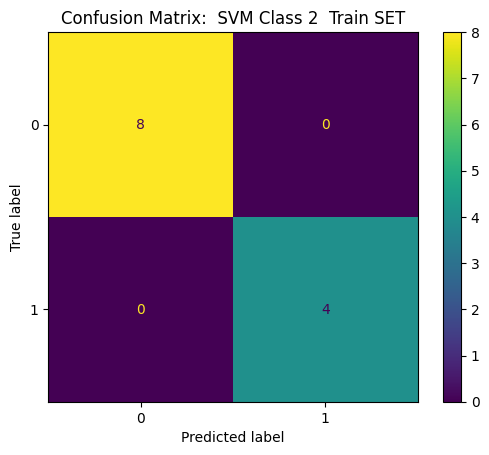

In [46]:
#print('\nConfusion Matrix Class 2:_ train set  SET\n')
ConfusionMatrixDisplay.from_estimator(SVM_2, X_Train, Y_Train_2)
plt.title('Confusion Matrix:  SVM Class 2  Train SET')

TEST set



Text(0.5, 1.0, 'Confusion Matrix:  SVM Class 2  TEST SET')

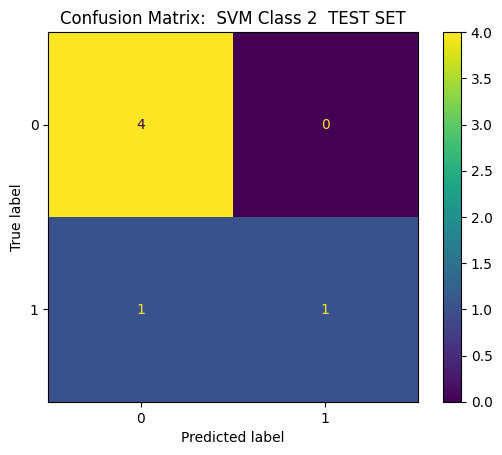

In [47]:
#print('\nConfusion Matrix Class 2:_ TESt set  SET\n')
ConfusionMatrixDisplay.from_estimator(SVM_2, X_Test, Y_Test_2)
plt.title('Confusion Matrix:  SVM Class 2  TEST SET')

Decision Boundary class 2  vs Class 0 ,class 1  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


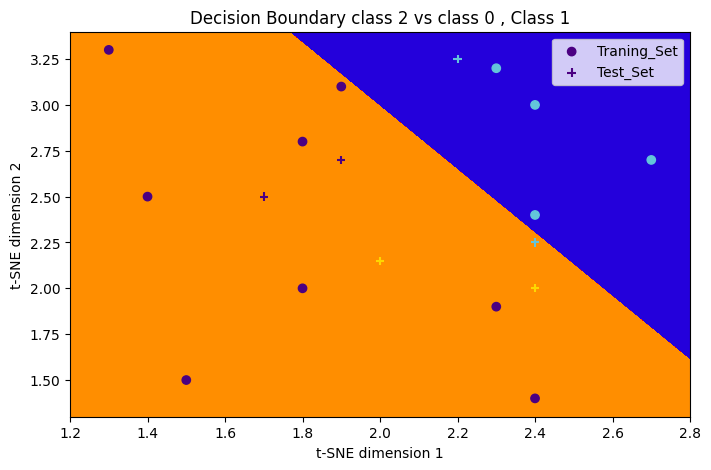

In [48]:
plot_decision_boundary(SVM_2, X_Train, Y_Train_2,X_Test,Y_Test_2,'Decision Boundary class 2 vs class 0 , Class 1')

get Aggregate data form  3  models

[0.89961255 0.65834089 0.53282798 0.58995245 0.23141509 0.24005828
 0.0710818  0.02658516 0.11719458 0.25799727 0.09176706 0.38237848] 
 [0.04969483 0.31065436 0.147408   0.06784875 0.87587755 0.61681211
 0.64777024 0.87581341 0.30393877 0.0760716  0.14733402 0.0481829 ] 
 [0.23989814 0.10377873 0.36272199 0.54601779 0.03072148 0.13583605
 0.35014139 0.24010571 0.61111761 0.80313247 0.85268408 0.80992895]

Confusion Matrix Class 2:_ training  set  SET



Text(0.5, 1.0, 'Confusion Matrix:  SVM Class Aggregated  Train SET')

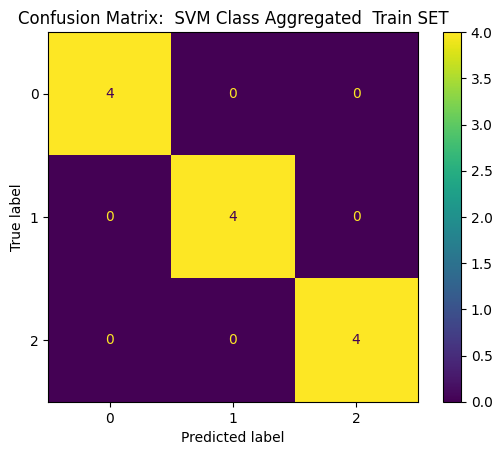

In [51]:
Agragate_data_training=Svm_predict(getmax(Y_tra_0),getmax(Y_tra_1),getmax(Y_tra_2)) 
cm = confusion_matrix(Y_Train,Agragate_data_training, labels=SVM.classes_)
disp=ConfusionMatrixDisplay(cm, display_labels=SVM.classes_)
print('\nConfusion Matrix Class 2:_ training  set  SET\n')
disp.plot()
plt.title('Confusion Matrix:  SVM Class Aggregated  Train SET')


In [53]:
Agragate_data=Svm_predict(Y_pro_0,Y_pro_1,Y_pro_2) 

print(Agragate_data)

[0.4753973  0.43049008 0.19551225 0.06530315 0.46202128 0.09449151] 
 [0.29112136 0.18123838 0.5        0.57065014 0.04333263 0.39916305] 
 [0.20961922 0.38903503 0.25768262 0.4519599  0.77782389 0.55156643]
[0, 0, 1, 1, 2, 2]


Confusion Matrix for O vs REST agragated (class 0 ,class 1 , Class 2)


Confusion Matrix Class 2:_ TEST set  SET



Text(0.5, 1.0, 'Confusion Matrix:  SVM Class Aggregated  TEST SET')

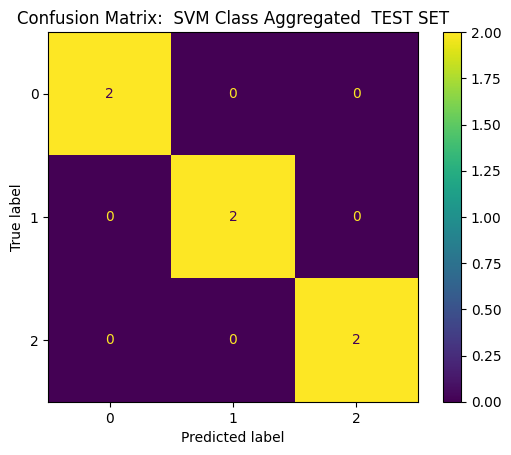

In [54]:
cm = confusion_matrix(Y_Test,Agragate_data, labels=SVM.classes_)
disp=ConfusionMatrixDisplay(cm, display_labels=SVM.classes_)
print('\nConfusion Matrix Class 2:_ TEST set  SET\n')
disp.plot()
plt.title('Confusion Matrix:  SVM Class Aggregated  TEST SET')

Decision Boundary O vs REST agragated (class 1  class 2 , Class 0)

[0.31715362 0.31660927 0.31606542 ... 0.19514053 0.19474587 0.19435182] 
 [0.93106638 0.93104653 0.93102667 ... 0.02393611 0.02392874 0.02392137] 
 [0.00978161 0.00980864 0.00983575 ... 0.958671   0.95878017 0.95888907]
[0.31715362 0.31660927 0.31606542 ... 0.19514053 0.19474587 0.19435182]


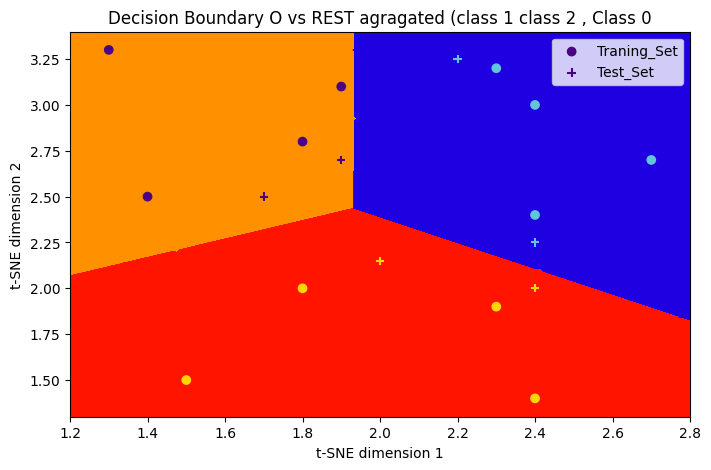

In [55]:
plot_decision_boundary_Agrgate("SVM",SVM_0,SVM_1,SVM_2, X_Train, Y_Train,X_Test,Y_Test,'Decision Boundary O vs REST agragated (class 1 class 2 , Class 0') # This function plots the decision boundary of the given SVM classifier on the training and test data.

In [56]:
result_svm_O_VS_REST=Svm_predict(Y_pro_0,Y_pro_1,Y_pro_2) 
result_svm_O_VS_REST=1-mean_squared_error(result_svm_O_VS_REST,Y_Test)
result_svm_defulat =SVM.score(X_Test,Y_Test)

[0.4753973  0.43049008 0.19551225 0.06530315 0.46202128 0.09449151] 
 [0.29112136 0.18123838 0.5        0.57065014 0.04333263 0.39916305] 
 [0.20961922 0.38903503 0.25768262 0.4519599  0.77782389 0.55156643]


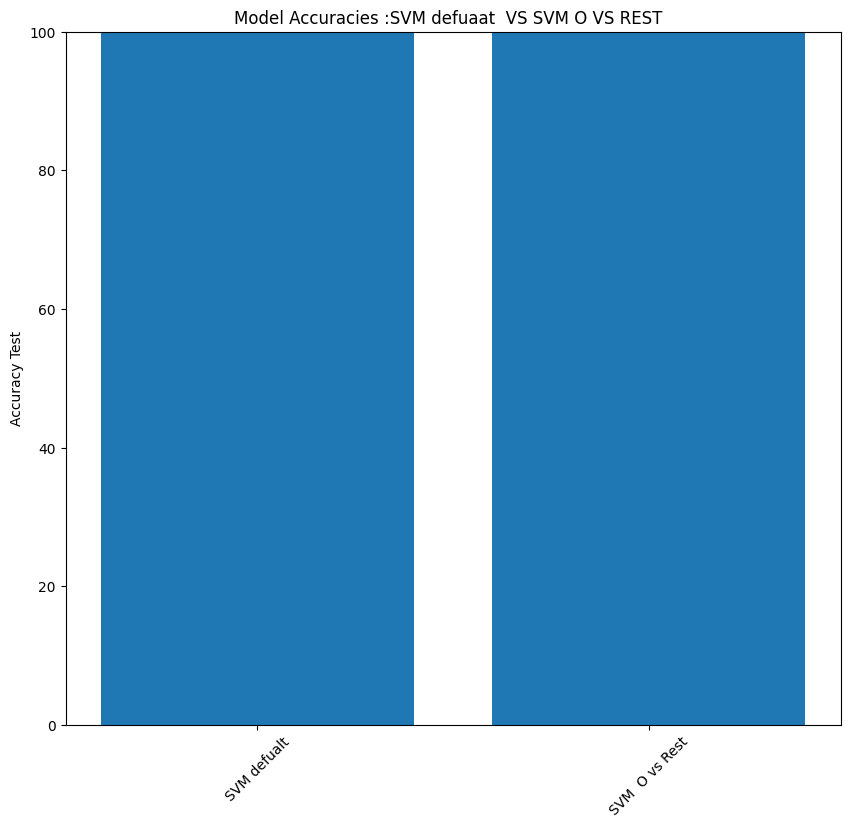

In [57]:
compare_plot_svm("SVM defuaat  VS SVM O VS REST  ",result_svm_O_VS_REST,result_svm_defulat  )

# Perceptron default

In [58]:
per = Perceptron(random_state=1)
per.fit(X_Train,Y_Train) # Train the Perceptron classifier using the training data
print(" accuracy trianing :",per.score(X_Train,Y_Train)) # Compute the classification accuracy of the Perceptron classifier on the training data
print(" accuracy Test :",per.score(X_Test,Y_Test))


 accuracy trianing : 0.9166666666666666
 accuracy Test : 0.8333333333333334


In [59]:
print("reslut form Perceptron \n",per.decision_function(X_Test) )

reslut form Perceptron 
 [[-0.07  -2.73  -1.95 ]
 [-0.21  -3.23  -0.89 ]
 [-1.19   1.785 -1.205]
 [-2.24   5.24   0.2  ]
 [-0.07  -6.005  1.025]
 [-1.89   3.215  0.525]]


Confusion Matrix: Perceptron train SET  

Text(0.5, 1.0, 'Confusion Matrix: Perceptron defualt Train SET')

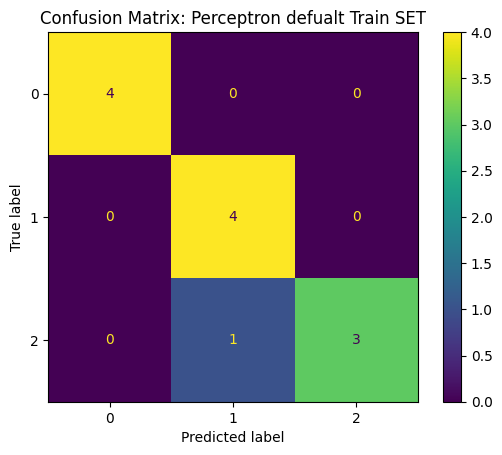

In [60]:
#print('\nConfusion Matrix:_ train SET\n')
ConfusionMatrixDisplay.from_estimator(per,X_Train,Y_Train)
plt.title('Confusion Matrix: Perceptron defualt Train SET')

Confusion Matrix: Perceptron defulat Test SET 

Text(0.5, 1.0, 'Confusion Matrix: Perceptron defualt TEST SET')

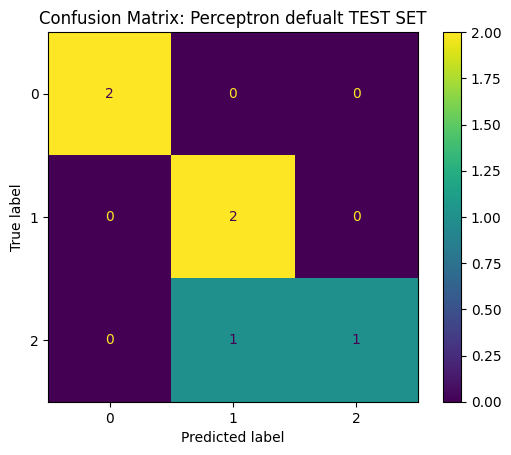

In [61]:
#print('\nConfusion Matrix:_ Test SET\n')
ConfusionMatrixDisplay.from_estimator(per,X_Test,Y_Test)
plt.title('Confusion Matrix: Perceptron defualt TEST SET')

Decision Doundary  Perceptron defulat

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


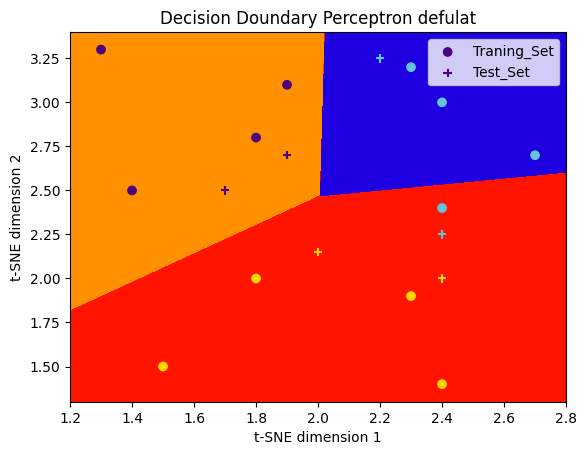

In [ ]:
plot_decision_boundary(per, X_Train, Y_Train,X_Test,Y_Test,'Decision Doundary Perceptron defulat')



# Perceptron O Vs Rest 

 

Perceptron class *0*

precporcceing  with the method 

In [63]:
Y_Train_0,Y_Test_0=preprocceing(0,Y_Train.copy(),Y_Test.copy())

In [64]:
perceptron_0 = Perceptron(random_state=10)  # Create a Perceptron object with a fixed random state
perceptron_0.fit(X_Train,Y_Train_0)  # Train the Perceptron classifier on the training data for class 0
print("accuracy Traning  : " , perceptron_0.score(X_Train,Y_Train_0))  # Compute the classification accuracy of the Perceptron classifier on the training data for class 0
Y_pred=perceptron_0.predict(X_Test) # to predict the class labels for the test set (X_Test).
print("accuracy Testing  : " ,perceptron_0.score(X_Test,Y_Test_0)) #to calculate the accuracy of the predicted labels compared to the true labels for the test set (Y_Test_0).

accuracy Traning  :  1.0
accuracy Testing  :  0.5


accuracy Testing  :  0.5


Confusion Matrix: tianing  SET  Perceptron class 0  vs Rest

Text(0.5, 1.0, 'Confusion Matrix: Perceptron O Vs Rest Train SET')

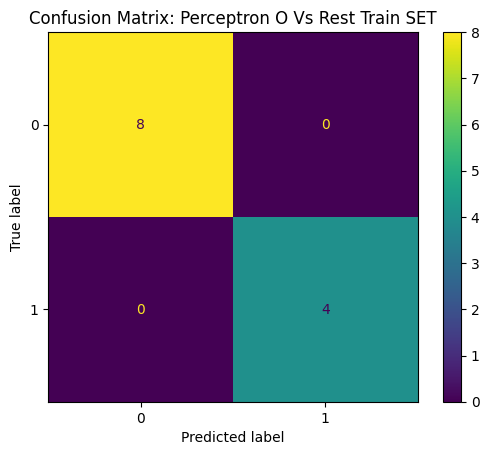

In [66]:
#print('\nConfusion Matrix:_ Trianing SET\n')
ConfusionMatrixDisplay.from_estimator(perceptron_0,X_Train,Y_Train_0)
plt.title('Confusion Matrix: Perceptron O Vs Rest Train SET')

Confusion Matrix: Test SET Perceptron class 0 vs Rest

Text(0.5, 1.0, 'Confusion Matrix: Perceptron O Vs Rest TEST SET')

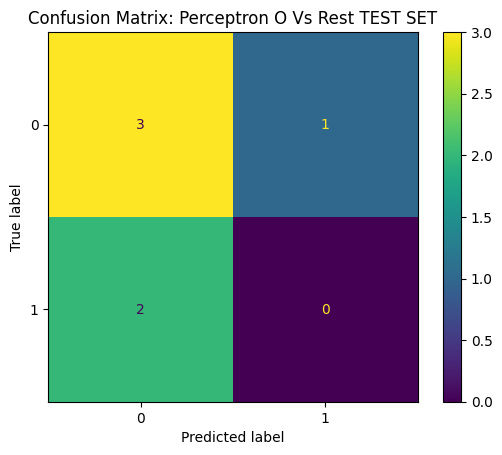

In [68]:
#print('\nConfusion Matrix:_ Test SET\n')
ConfusionMatrixDisplay.from_estimator(perceptron_0,X_Test,Y_Test_0)
plt.title('Confusion Matrix: Perceptron O Vs Rest TEST SET')

Decision Doundary Perceptron  class 0 vs Rest

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


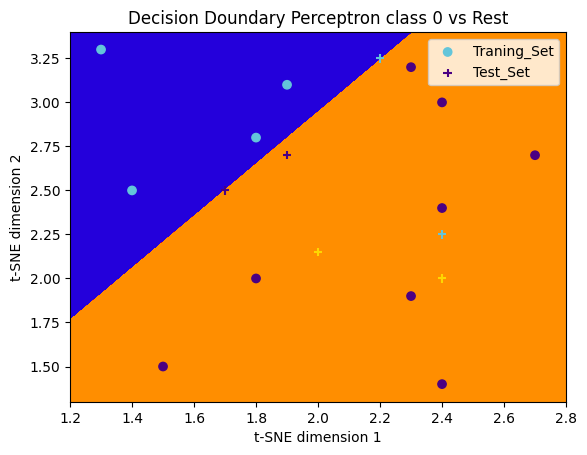

In [ ]:
plot_decision_boundary(perceptron_0, X_Train, Y_Train_0,X_Test,Y_Test_0,'Decision Doundary Perceptron class 0 vs Rest')

Perceptron class 1 vs class 0 , class 2 

In [71]:
perceptron_1= Perceptron(random_state=10)
perceptron_1.fit(X_Train,Y_Train_1)
print(" accuracy  traing  : ",perceptron_1.score(X_Train,Y_Train_1))
Y_pred=perceptron_1.predict(X_Test)
print(" accuracy  testing   : ",perceptron_1.score(X_Test,Y_Test_1))

 accuracy  traing  :  0.9166666666666666
 accuracy  testing   :  0.6666666666666666


 accuracy  testing   :  0.6666666666666666


Confusion Matrix: Training SET Perceptron class 1 vs Reset

Text(0.5, 1.0, 'Confusion Matrix: Perceptron 1 Vs Rest Train SET')

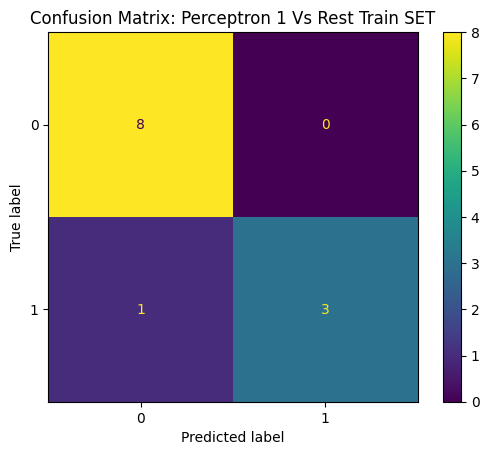

In [73]:
#print('\nConfusion Matrix Training SET\n')
ConfusionMatrixDisplay.from_estimator(perceptron_1,X_Train,Y_Train_1)
plt.title('Confusion Matrix: Perceptron 1 Vs Rest Train SET')

Confusion Matrix: Test SET Perceptron class 1 vs Reset

Text(0.5, 1.0, 'Confusion Matrix: Perceptron 1 Vs Rest TEST SET')

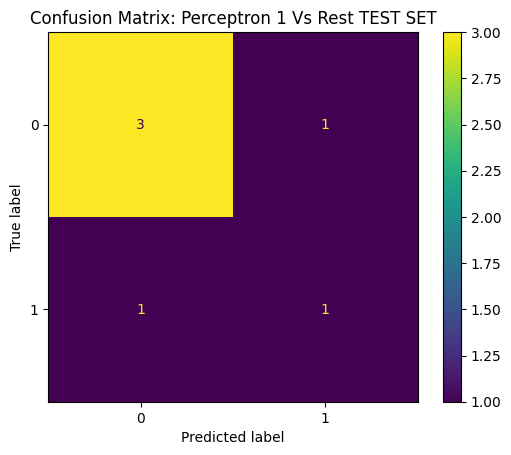

In [74]:
#print('\nConfusion Matrix:_ Test SET\n')
ConfusionMatrixDisplay.from_estimator(perceptron_1,X_Test,Y_Test_1)
plt.title('Confusion Matrix: Perceptron 1 Vs Rest TEST SET')

Decision Doundary Perceptron class 1 vs Rest

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


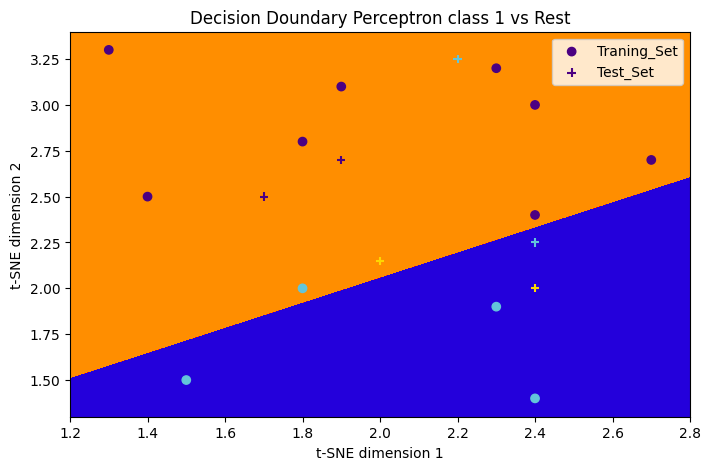

In [75]:
plot_decision_boundary(perceptron_1, X_Train, Y_Train_1,X_Test,Y_Test_1,'Decision Doundary Perceptron class 1 vs Rest')

Perceptron class 2 vs Rest

In [77]:
perceptron_2= Perceptron(random_state=42)
perceptron_2.fit(X_Train,Y_Train_2)
print(" Accuracy  tarning :",perceptron_2.score(X_Train,Y_Train_2))
Y_pred=perceptron_2.predict(X_Test)
print(" Accuracy  testing :",perceptron_2.score(X_Test,Y_Test_2))

 Accuracy  tarning : 0.75
 Accuracy  testing : 0.5


Confusion Matrix: Trainging SET Perceptron class 2 vs Reset

Text(0.5, 1.0, 'Confusion Matrix: Perceptron 2 Vs Rest Train SET')

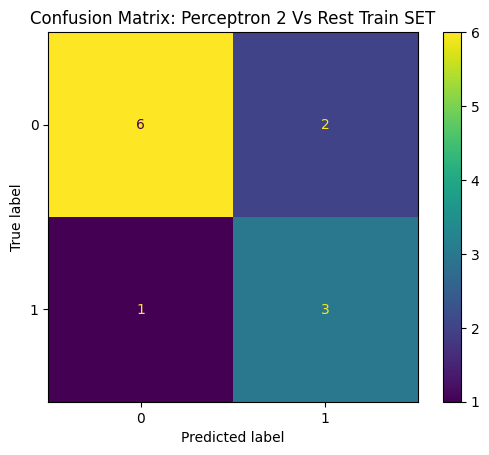

In [78]:
#print('\nConfusion Matrix:_ train SET\n')
ConfusionMatrixDisplay.from_estimator(perceptron_2,X_Train,Y_Train_2)
plt.title('Confusion Matrix: Perceptron 2 Vs Rest Train SET')

Confusion Matrix: Test SET Perceptron class 2 vs Reset

Text(0.5, 1.0, 'Confusion Matrix: Perceptron 2 Vs Rest TEST SET')

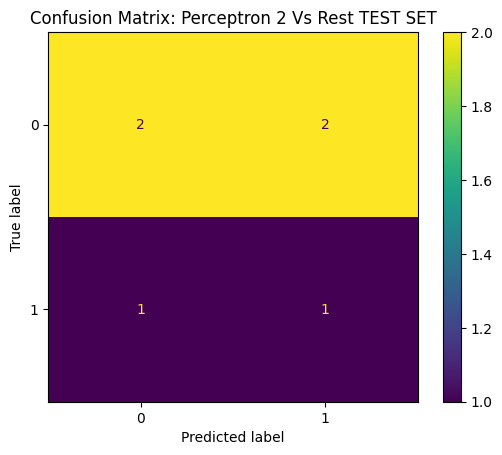

In [79]:
#print('\nConfusion Matrix:_ Test SET\n')
ConfusionMatrixDisplay.from_estimator(perceptron_2,X_Test,Y_Test_2)
plt.title('Confusion Matrix: Perceptron 2 Vs Rest TEST SET')

Decision Doundary Perceptron class 2



[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


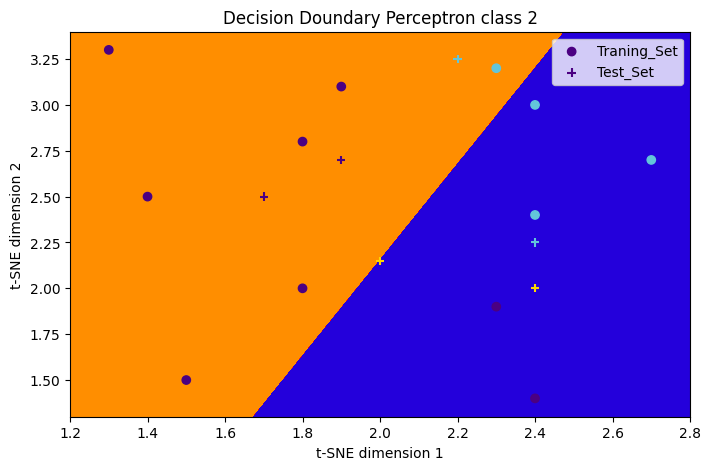

In [80]:
plot_decision_boundary(perceptron_2, X_Train, Y_Train_2,X_Test,Y_Test_2,'Decision Doundary Perceptron class 2')

Confusion Matrix: Tarning  SET Perceptron Agragateed class 0 , class 1, class 2 

---



Text(0.5, 1.0, 'Confusion Matrix: Perceptron Agragateed Train SET')

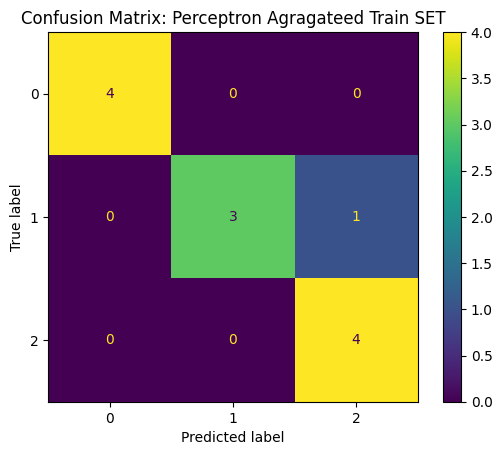

In [82]:
cm = confusion_matrix(Y_Train,perceptron_predict(perceptron_0,perceptron_1,perceptron_2,X_Train) , labels=per.classes_)
disp=ConfusionMatrixDisplay(cm, display_labels=per.classes_)
#print('\nConfusion Matrix: Train SET\n')
disp.plot()
plt.title('Confusion Matrix: Perceptron Agragateed Train SET')

Confusion Matrix: Test SET Perceptron Agragateed class 0 , class 1, class 2 


Text(0.5, 1.0, 'Confusion Matrix: Perceptron Agragateed TEST SET')

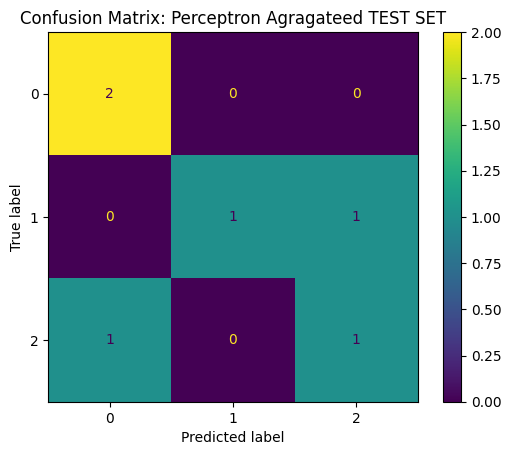

In [83]:
cm = confusion_matrix(Y_Test,perceptron_predict(perceptron_0,perceptron_1,perceptron_2,X_Test) , labels=per.classes_)
disp=ConfusionMatrixDisplay(cm, display_labels=per.classes_)
#print('\nConfusion Matrix:Test SET\n')
disp.plot()
plt.title('Confusion Matrix: Perceptron Agragateed TEST SET')

Decision Doundary for agragared Perceptron class 0 ,class 1 , class 2 


[-2.08   -2.0865 -2.093  ... -3.2314 -3.2379 -3.2444]


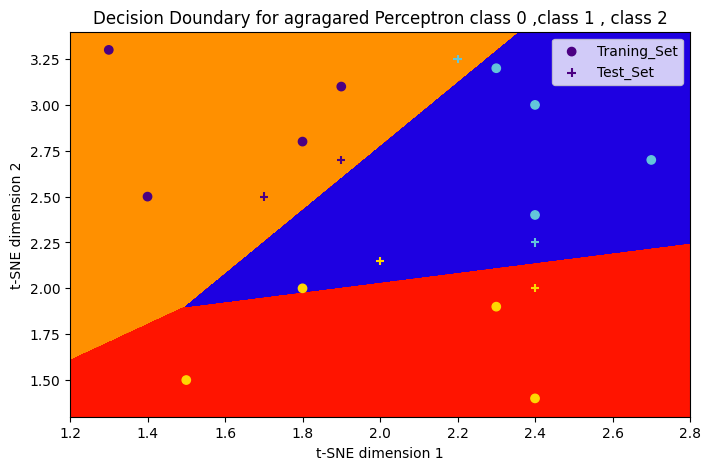

In [84]:
plot_decision_boundary_Agrgate("PERC",perceptron_0,perceptron_1,perceptron_2, X_Train, Y_Train,X_Test,Y_Test,'Decision Doundary for agragared Perceptron class 0 ,class 1 , class 2')

In [86]:
from sklearn.metrics import mean_squared_error
perceptron_accurcy =mean_squared_error(perceptron_predict(perceptron_0,perceptron_1,perceptron_2,X_Test),Y_Test)
SVM_accurcy =mean_squared_error(Svm_predict(Y_pro_0,Y_pro_1,Y_pro_2) ,Y_Test)



[0.4753973  0.43049008 0.19551225 0.06530315 0.46202128 0.09449151] 
 [0.29112136 0.18123838 0.5        0.57065014 0.04333263 0.39916305] 
 [0.20961922 0.38903503 0.25768262 0.4519599  0.77782389 0.55156643]


# compare SVM VS perceptron  

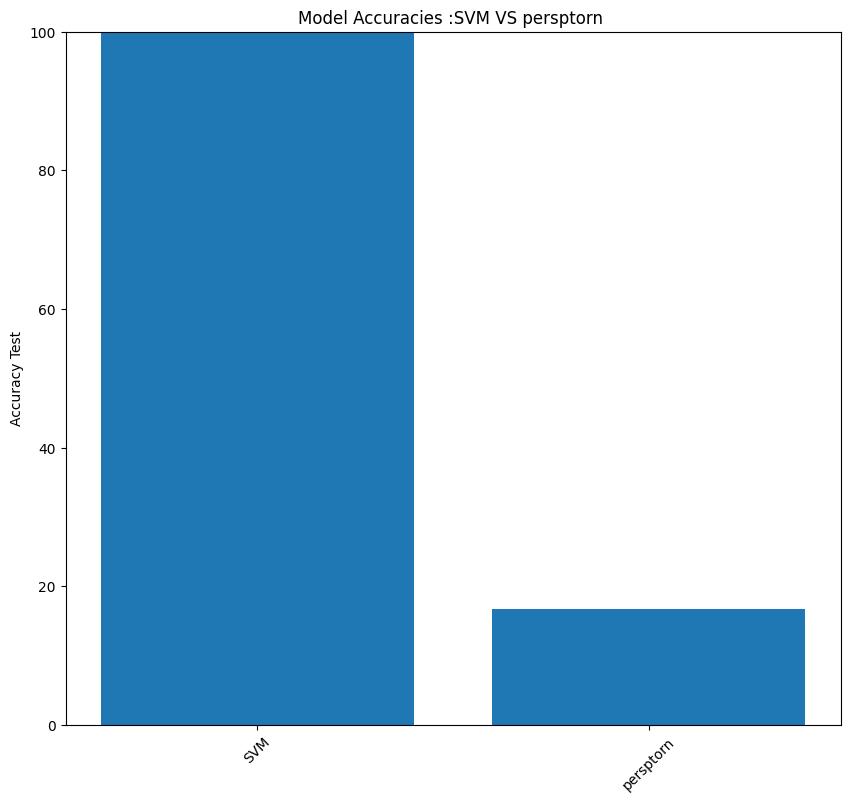

In [87]:
compare_plot("SVM VS persptorn ",1-SVM_accurcy,1-perceptron_accurcy )

# Task 2

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [89]:
warnings.filterwarnings('ignore')

# Load DATA SET

In [91]:
#for error  in URL  used  the CSV file  because data in URL has been deleted
try :
  df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data")
except Exception as e:
  print("we can't found the Data Set in Your URL and Try to import from  a file CSV.\n and this is the Error .",e)
  try:
    df=pd.read_csv("./car_evaluation.csv")
    print("the file iS imported succsfully  .")
  except Exception as e:
     print("please ensure  the path file of Data set is right \n  and this is the Error .",e )
   

we can't found the Data Set in Your URL and Try to import from  a file CSV.
 and this is the Error . HTTP Error 404: Not Found
the file iS imported succsfully  .


In [92]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


# perporcesing  for  Data 

change  columns names 

In [93]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns=col_names

In [94]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [96]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [97]:
# separate the target column 
X=df.drop('class',axis=1)
Y=df['class']

In [98]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=428,shuffle=True,random_state=45)
print(X_train.shape,X_test.shape)

(1299, 6) (428, 6)


In [99]:
## splitting the data into 1000 training ,428 testing and 300 for validation 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=300,shuffle=True,random_state=45)
print(X_train.shape,X_val.shape)

(999, 6) (300, 6)


encodeing  data  to numbers

In [100]:
ordinal_encoder = OrdinalEncoder()
y_train=np.array(y_train).reshape(-1, 1)
y_val=np.array(y_val).reshape(-1, 1)
y_test=np.array(y_test).reshape(-1, 1)
## Encode the training ,validation and testing data 
X_train_new = ordinal_encoder.fit_transform(X_train)
y_train_new = ordinal_encoder.fit_transform(y_train)
y_val_new = ordinal_encoder.fit_transform(y_val)
X_val_new =ordinal_encoder.fit_transform(X_val)
X_test_new = ordinal_encoder.fit_transform(X_test)
y_test_new = ordinal_encoder.fit_transform(y_test)

In [101]:
print(X_train_new)

[[1. 1. 2. 1. 1. 2.]
 [1. 3. 0. 2. 2. 1.]
 [0. 3. 1. 0. 0. 1.]
 ...
 [0. 0. 0. 2. 2. 1.]
 [3. 3. 3. 0. 2. 2.]
 [2. 1. 2. 0. 2. 2.]]


# Making  Model  

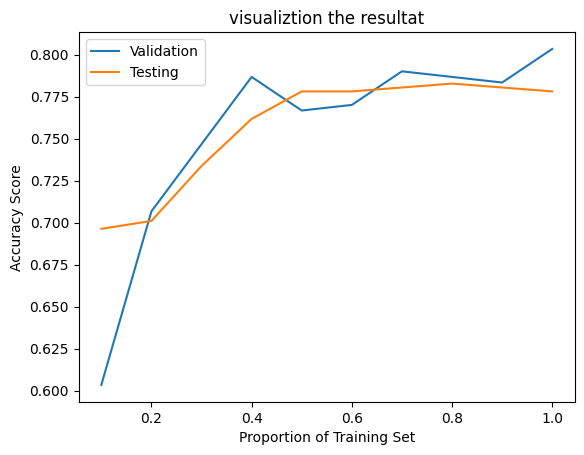

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
# Define the range of proportions of the training set to use
train_proportions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# Initialize lists to store the accuracy scores
val_scores = []
test_scores = []

# Loop over the range of proportions and train KNN models
for proportion in train_proportions:
    num_train_samples = int(proportion * len(X_train))
    # Create a KNN classifier with K=2
    knn = KNeighborsClassifier(weights='distance',n_neighbors=2)
    # Fit the classifier on the training set
    knn.fit(X_train_new[:num_train_samples], y_train_new[:num_train_samples])
    # Evaluate the classifier on the validation set
    val_pred = knn.predict(X_val_new)
    val_acc = accuracy_score(y_val_new, val_pred)
    val_scores.append(val_acc)
    # Evaluate the classifier on the testing set
    test_pred = knn.predict(X_test_new)
    test_acc = accuracy_score(y_test_new, test_pred)
    test_scores.append(test_acc)
# Plot the accuracy scores against the proportion of the training set used
plt.plot(train_proportions, val_scores, label='Validation')
plt.plot(train_proportions, test_scores, label='Testing')
plt.xlabel('Proportion of Training Set')
plt.ylabel('Accuracy Score')
plt.title("visualiztion the resultat")
plt.legend()
plt.show()

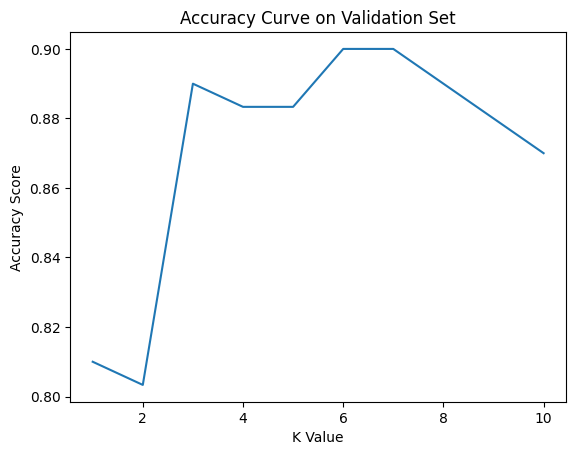

In [103]:

# Define the range of K values to try
K_values = range(1, 11)

# Initialize a list to store the accuracy scores
val_scores = []

# Loop over the range of K values and train KNN models
for K in K_values:
   
    knn = KNeighborsClassifier(weights='distance',n_neighbors=K)
    
   
    knn.fit(X_train_new, y_train_new)
    
    # Evaluate the classifier on the validation set
    val_pred = knn.predict(X_val_new)
    val_acc = accuracy_score(y_val_new, val_pred)
    val_scores.append(val_acc)

# Plot the accuracy scores against the K values
plt.plot(K_values, val_scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Curve on Validation Set')
plt.show()